In [1]:
import numpy as np
import io
# install osmnx through pip, conda version is too old
# osmnx version should be 1.2.2 and shapely 2.0.0
import osmnx as ox
import matplotlib.pyplot as plt
import cairosvg

import swisstopo_helpers as sw
from pathlib import Path

import re
import json
from pathlib import Path
import numpy as np
import cv2
import io
from geojson import Feature, GeoJSON, Polygon
from shapely import Polygon as PolygonShapely

# constants:
const_save_dir = Path("./swisstopo").resolve().absolute()


/opt/homebrew/Caskroom/miniforge/base/envs/DL/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/DL/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/DL/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/DL/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/DL/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/Caskroo

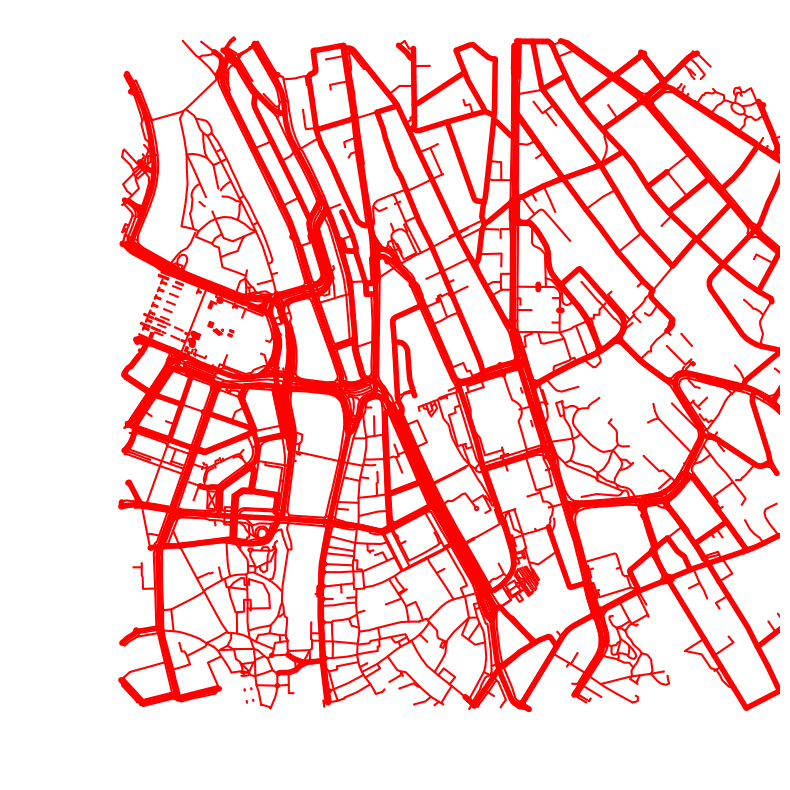

<Figure size 640x480 with 0 Axes>

In [2]:
# example plot using distance from a point (edges are not contained)

plt.ioff()
fig, ax = plt.subplots(figsize=(10, 10))

# ETH 47.377126, 8.5465143
bbox = ox.utils_geo.bbox_from_point((47.377126, 8.5465143), dist=500)

# EPFL 46.5186199,6.567573
# bbox = ox.utils_geo.bbox_from_point((46.5186199,6.567573), dist=500)

# sort entries in bbox
bbox = list(bbox)
bbox[0:2] = sorted(bbox[0:2])
bbox[2:4] = sorted(bbox[2:4])

margin = 0.2
deltaLatMargin = (bbox[1]-bbox[0]) * margin
deltaLongMargin = (bbox[2]-bbox[3]) * margin
bboxM = [bbox[0] - deltaLatMargin, bbox[1] + deltaLatMargin, bbox[2] + deltaLongMargin, bbox[3] - deltaLongMargin]

poly = ox.utils_geo.bbox_to_poly(*bboxM)

buildings = ox.geometries_from_polygon(poly, tags={'building': True, 'landuse': False})
roads = ox.graph_from_polygon(poly, retain_all=True, truncate_by_edge=False)
# nodes, edges = ox.graph_to_gdfs(roads, )

# edges.plot(ax=ax, linewidth=1, edgecolor='red', )
ox.plot_figure_ground(roads, ax=ax, edge_color="red")
# ox.plot_figure_ground(roads, ax=ax, default_width=3, edge_color="red")
buildings.plot(ax=ax, color='black', alpha=1)

# crop
ax.set_xlim((bboxM[2], bboxM[3]))
ax.set_ylim((bboxM[0], bboxM[1]))
ax.set_axis_off()

fig.tight_layout(pad=-0.08)

# convert plot to svg, then print svg without anti-aliasing
imgdata = io.StringIO()
fig.savefig(imgdata, format='svg')
imgdata.seek(0)  # rewind the data

svg_dta = imgdata.read() # convert to string
svg_dta = svg_dta.replace("version=\"1.1\">", "shape-rendering=\"crispEdges\" version=\"1.1\">") # add no antialiasing to svg
cairosvg.svg2png(bytestring=svg_dta, write_to="output.png", output_height=3000)


In [3]:
# downloading from swisstopo using a GPS bounding box
def transform_osm_to_sw(north, south, east, west):
  # [LONGITUDE_WEST, LAT_SOUTH, LONG_EAST, LAT_NORTH]
  return [west, south, east, north]

class Arguments(object):
  date_range = None
  bbox = None
  resolution = 0.1
  save_dir = const_save_dir
  max_rows = 0

args = Arguments()

#use bounding box from above
args.bbox = transform_osm_to_sw(*bbox)
print(args.bbox)
url = sw.get_url(args)
print(url)
sw.download_tifs(url, args)


[8.553154586934241, 47.38162260167746, 8.53987401306576, 47.37262939832253]
https://data.geo.admin.ch/api/stac/v0.9/collections/ch.swisstopo.swissimage-dop10/items?bbox=8.553154586934241,47.38162260167746,8.53987401306576,47.37262939832253
https://data.geo.admin.ch/ch.swisstopo.swissimage-dop10/swissimage-dop10_2019_2683-1247/swissimage-dop10_2019_2683-1247_0.1_2056.tif
{'type': 'Polygon', 'coordinates': [[[8.5376903, 47.3776072], [8.5375049, 47.3686138], [8.5507426, 47.3684871], [8.5509303, 47.3774805], [8.5376903, 47.3776072]]]}


swissimage-dop10_2019_2683-1247_8.54-47.37-8.55-47.38_2019-01-01.tif
[[8.53769, 47.377607], [8.537505, 47.368614], [8.550743, 47.368487], [8.55093, 47.37748], [8.53769, 47.377607]]
[47.368614, 47.377607, 8.53769, 8.55093]
Turning Angle: -0.014 rad or -0.809 deg
POLYGON ((8.53769 47.377607, 8.537505 47.368614, 8.550743 47.368487, 8.55093 47.37748, 8.53769 47.377607))


/opt/homebrew/Caskroom/miniforge/base/envs/DL/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/DL/lib/python3.9/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/DL/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/DL/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/DL/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/homebrew/Caskroo

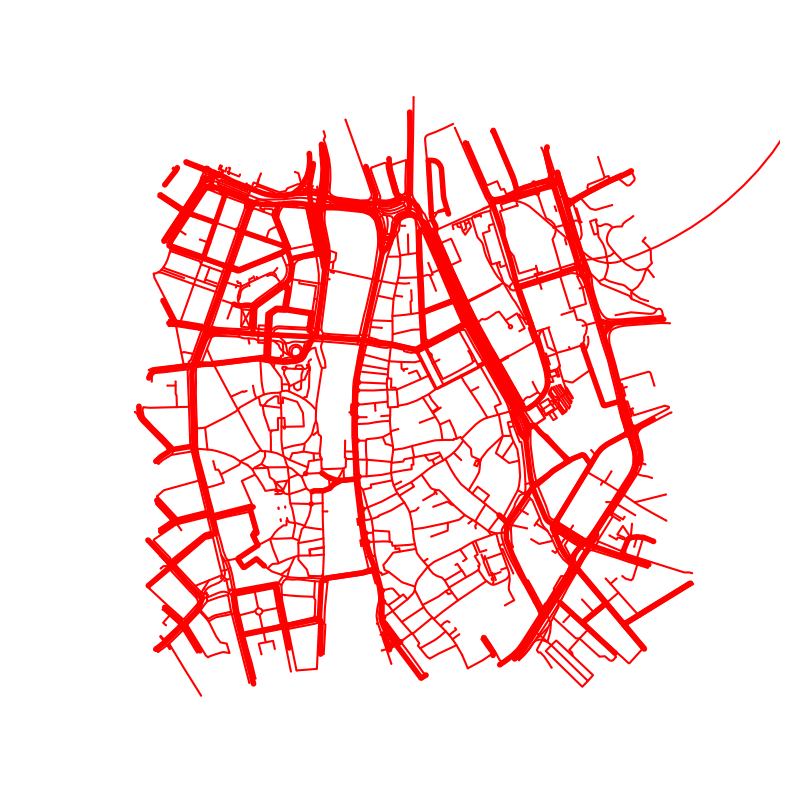

In [4]:
# rotate swissimage tiff by angle found in its json
# produce OSM overlay that fits perfectly onto rotated image

for entry in const_save_dir.iterdir():
  if (entry.name.find("swissimage-dop10") == 0 and entry.name.endswith(".tif")):
    # todo, maybe skip if there are multiple time variants of this image?
    print(entry.name)
    image_id = re.search(
        "swissimage-dop10_([0-9]+)_[0-9]+-[0-9]+", entry.name)[0]

    # load geojson
    json_file_name = image_id + ".geojson"
    jsonFile = open(const_save_dir.joinpath(json_file_name), "r")
    jsonContent = jsonFile.read()
    jsonFile.close()
    geo = Feature(**json.loads(jsonContent))
    geoCoords = geo["geometry"]["coordinates"][0]

    print(geoCoords)

    # get bbox from coords and sort them
    bbox = [geoCoords[1][1], geoCoords[0][1], geoCoords[0][0], geoCoords[3][0]]
    #       47.3684871,      47.3776072,      8.5375049,       8.5509303          sample values for zurich center
    bbox[0:2] = sorted(bbox[0:2])
    bbox[2:4] = sorted(bbox[2:4])

    print(bbox)

    # calculate dimensions in coord units
    deltaLat = (bbox[1]-bbox[0])
    deltaLong = (bbox[2]-bbox[3])

    # calculate turning angle in rad
    coords = np.array(geoCoords)
    xDir = coords[0] - coords[3]
    xDir /= [deltaLong, deltaLat]
    angle = - np.angle(xDir[0] + xDir[1]*1j)
    print(f"Turning Angle: {angle:.3f} rad or {angle/np.pi * 180:.3f} deg")

    # resolution of swissimage tiles
    image = cv2.imread(str(const_save_dir.joinpath(entry.name)))

    shape = (image.shape[1], image.shape[0])

    matrix = cv2.getRotationMatrix2D(
        center=(0, 0), angle=angle / np.pi * 180, scale=1)
    image = cv2.warpAffine(
        src=image, M=matrix, dsize=shape, flags=cv2.INTER_NEAREST)

    cv2.imwrite(str(const_save_dir.joinpath(
        f'{image_id}_turned.jpg')), image,)

    # get OSM data
    # poly = ox.utils_geo.bbox_to_poly(*bbox)
    poly = PolygonShapely(geoCoords)
    print(poly)

    # load osm infos TODO tags
    buildings = ox.geometries_from_polygon(poly, tags={'building': True})
    roadnetwork = ox.graph_from_polygon(poly, retain_all=True, truncate_by_edge=True)
    # nodes, edges = ox.graph_to_gdfs(roadnetwork)

    # plot osm data TODO road width
    plt.ioff()
    fig, ax = plt.subplots(figsize=(10, 10))

    ox.plot_figure_ground(roadnetwork, ax=ax, edge_color="red")
    buildings.plot(ax=ax, color='black', facecolor='black',
                   edgecolor='black', alpha=1)
    # edges.plot(ax=ax, linewidth=1, edgecolor='red')

    # corner dots
    ax.scatter([x for (x, y) in coords], [y for (x, y)
               in coords], s=40, c="green", alpha=0.5)
    ax.scatter([x for (x, y) in coords], [
               y for (x, y) in coords], s=5, c="red", alpha=1)

    # crop
    ax.set_xlim((bbox[2], bbox[3]))
    ax.set_ylim((bbox[0], bbox[1]))
    ax.set_axis_off()

    fig.tight_layout(pad=-0.08)

    # convert plot to svg, then print svg without anti-aliasing
    imgdata = io.StringIO()
    fig.savefig(imgdata, format='svg')
    imgdata.seek(0)  # rewind the data

    svg_dta = imgdata.read()  # convert to string
    # add no antialiasing to svg
    svg_dta = svg_dta.replace(
        "version=\"1.1\">", "shape-rendering=\"crispEdges\" version=\"1.1\">")

    cairosvg.svg2png(bytestring=svg_dta, write_to=str(const_save_dir.joinpath(f'{image_id}_segmentation.png')), output_height=3000)


